# Regressão logística 

In [3]:
# BIBLIOTECAS QUE SERÃO UTILIZADAS E SUAS FUNÇÕES. 
import pandas as pd                       # Biblioteca de manipulação de dados
import numpy as np                        # Biblioteca de cálculos aritméticos 
import matplotlib.pyplot as plt           # Biblioteca para criação de gráficos
import seaborn as sns                     # Biblioteca de visualização de dados estátisticos
%matplotlib inline                        
import statsmodels.api as sm              # Biblioteca permite que o usuário explore dados e realize testes estátisticos
import statsmodels.formula.api as smf     # API é um pacote mais parecido com o R, mais voltado para análises estatísticas.
import parser 


In [4]:
from sklearn.linear_model import LogisticRegression #Bibliote para aprendizado de máquina, chamando o modelo linear. 
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [60]:
# Importando dados do "Dados Titanic.csv"
titanic = pd.read_csv('C:\Cientista de dados\Modelos-Estatisticos\Dados Titanic.csv', encoding='ISO-8859-1', sep=';')
titanic.head()

,Passageiro,Sobrevivente,Classe,Nome,Sexo,Idade,Irmãos,Pais,Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22,1,0,"7,25"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38,1,0,712.833
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26,0,0,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35,1,0,"53,1"
4,5,0,3,"Allen, Mr. William Henry",masculino,35,0,0,"8,05"


In [61]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

In [62]:
# Quantos sobreviveram e não sobreviveram
(titanic.Sobrevivente.value_counts() / titanic.shape[0]) * 100

0    59.383754
1    40.616246
Name: Sobrevivente, dtype: float64

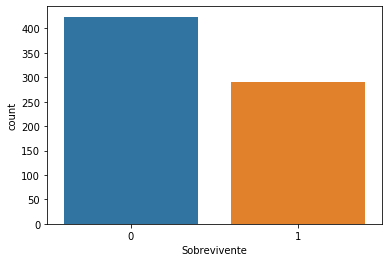

,values,n,perc
0,0,424,59.384
1,1,290,40.616


In [64]:
freq(titanic.Sobrevivente, plot=True)

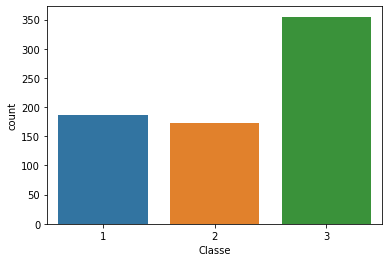

,values,n,perc
3,3,355,49.72
1,1,186,26.05
2,2,173,24.23


In [68]:
freq(titanic.Classe, plot=True)

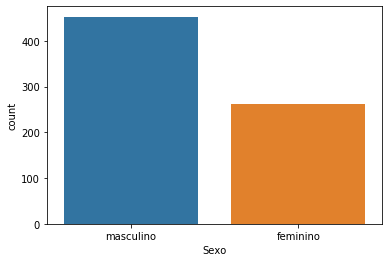

,values,n,perc
masculino,masculino,453,63.445
feminino,feminino,261,36.555


In [69]:
freq(titanic.Sexo, plot=True)

In [71]:
titanic.Idade.describe()

count    714.000000
mean      29.712885
std       14.529273
min        0.000000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Idade, dtype: float64

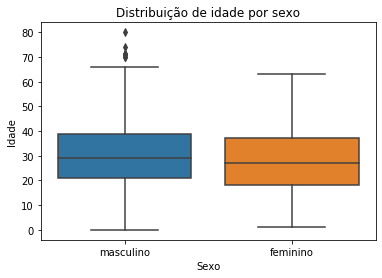

In [72]:
sns.boxplot(x='Sexo', y='Idade', data=titanic)
plt.title('Distribuição de idade por sexo')
plt.show()